In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Reload the model h5 format

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model_path='Saved Model/CNN_VIS_0.9833333492279053_model_1619112578.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [4]:
model=reload_model

In [5]:
model.layers

## Testing a random image

In [6]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[5.1155919e-08 9.9748516e-01 6.6239392e-10 6.4331900e-08 2.5147169e-03
  2.3137806e-10]]
1


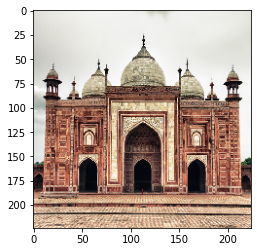

In [38]:
random_image=image.load_img('Images/mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Layers Visualization

In [11]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'dropout', 'flatten', 'dense', 'dropout_1', 'dense_1']


In [12]:
model_layers

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'dropout',
 'flatten',
 'dense',
 'dropout_1',
 'dense_1']

In [13]:
from tensorflow.keras.models import Model

## Convolutional Layers Implementation

In [14]:
conv2d_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

In [15]:
conv2d_features=conv2d_ouput.predict(test_image)
conv2d_1_features=conv2d_1_ouput.predict(test_image)
conv2d_2_features=conv2d_2_ouput.predict(test_image)
conv2d_3_features=conv2d_3_ouput.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)

Conv layer feature output shape:  (1, 224, 224, 32)
Conv_1 layer feature output shape:  (1, 112, 112, 64)
Conv_2 layer feature output shape:  (1, 56, 56, 128)
Conv_3 layer feature output shape:  (1, 28, 28, 256)


## Maxpooling Layers Implementation

In [16]:
max_pooling_2d_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
max_pooling_2d_1_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
max_pooling_2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
max_pooling_2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)

In [17]:
maxpool2d_features=max_pooling_2d_output.predict(test_image)
maxpool2d_1_features=max_pooling_2d_1_output.predict(test_image)
maxpool2d_2_features=max_pooling_2d_2_output.predict(test_image)
maxpool2d_3_features=max_pooling_2d_3_output.predict(test_image)
print('Conv layer feature output shape: ',maxpool2d_features.shape)
print('Conv_1 layer feature output shape: ',maxpool2d_1_features.shape)
print('Conv_2 layer feature output shape: ',maxpool2d_2_features.shape)
print('Conv_3 layer feature output shape: ',maxpool2d_3_features.shape)

Conv layer feature output shape:  (1, 112, 112, 32)
Conv_1 layer feature output shape:  (1, 56, 56, 64)
Conv_2 layer feature output shape:  (1, 28, 28, 128)
Conv_3 layer feature output shape:  (1, 14, 14, 256)


## Dense Layer Implementation

In [18]:
dense_output=Model(inputs=model.input,outputs=model.get_layer('dense').output)
dense_1_output=Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

In [19]:
dense_features=dense_output.predict(test_image)
dense_1_features=dense_1_output.predict(test_image)
print('Dense layer feature output shape: ',dense_features.shape)
print('Dense_1 layer feature output shape: ',dense_1_features.shape)

Dense layer feature output shape:  (1, 512)
Dense_1 layer feature output shape:  (1, 6)


## Layers Visualization
- conv2d
- max_pooling2d
- conv2d_1
- max_pooling2d_1
- conv2d_2
- max_pooling2d_2
- conv2d_3
- max_pooling2d_3
- dropout

## Convolution: 0

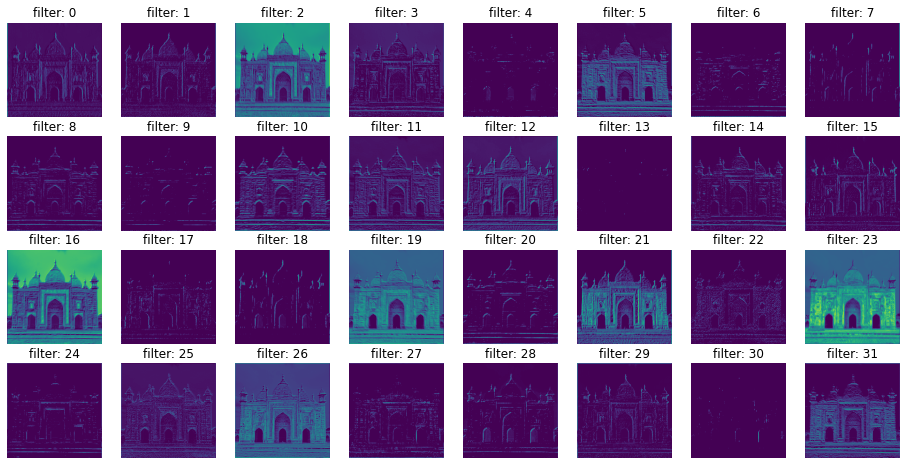

In [20]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i])
plt.show()

## Maxpooling2D: 0

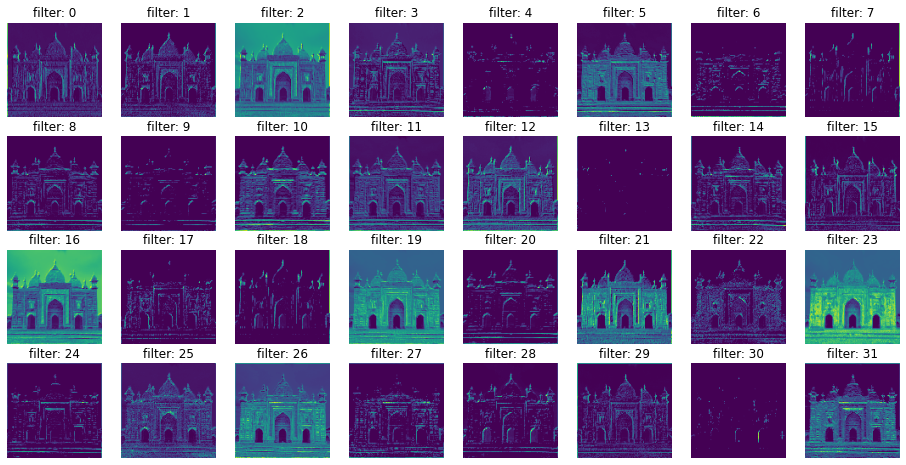

In [21]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i])
plt.show()

## Convolution: 1

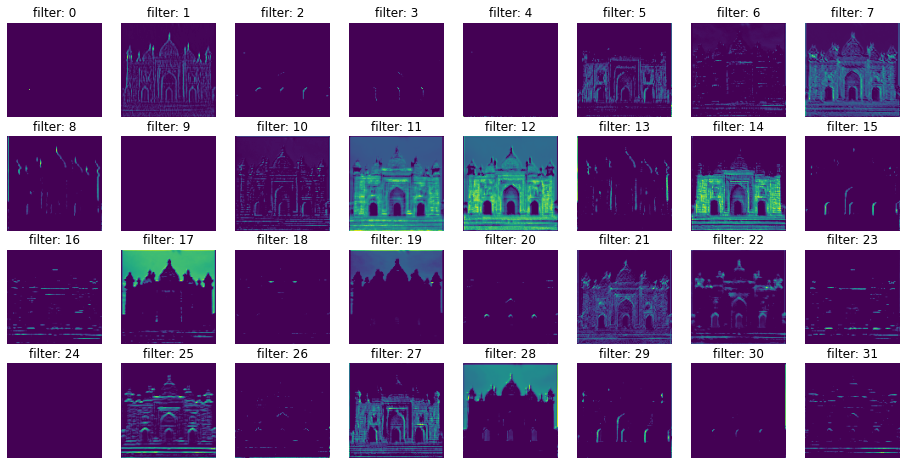

In [22]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i])
plt.show()

## Maxpooling2D: 1

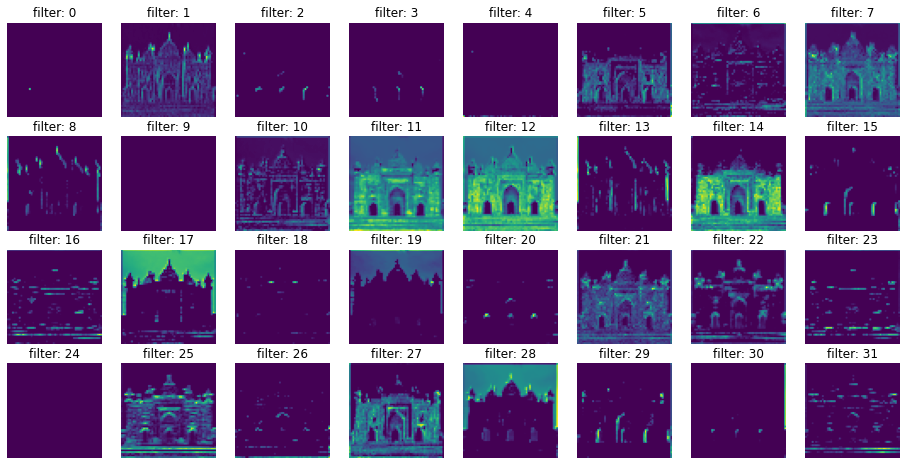

In [23]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i])
plt.show()

## Convolution: 2

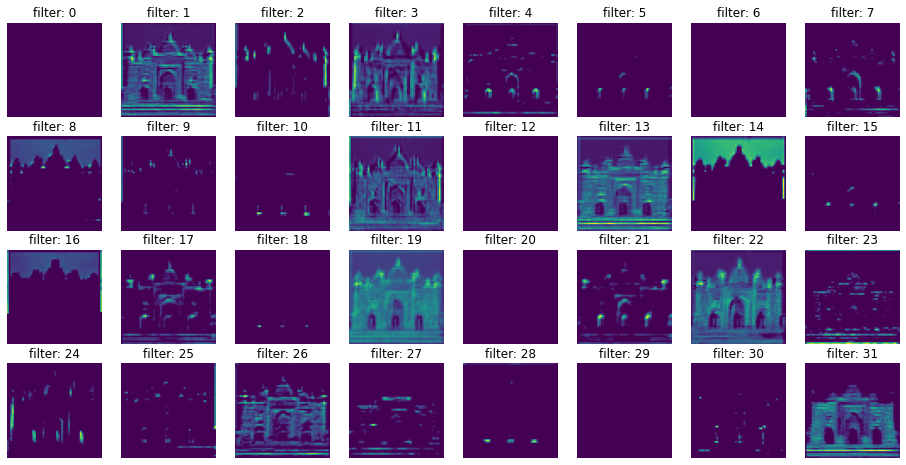

In [24]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i])
plt.show()

## Maxpooling2D : 2

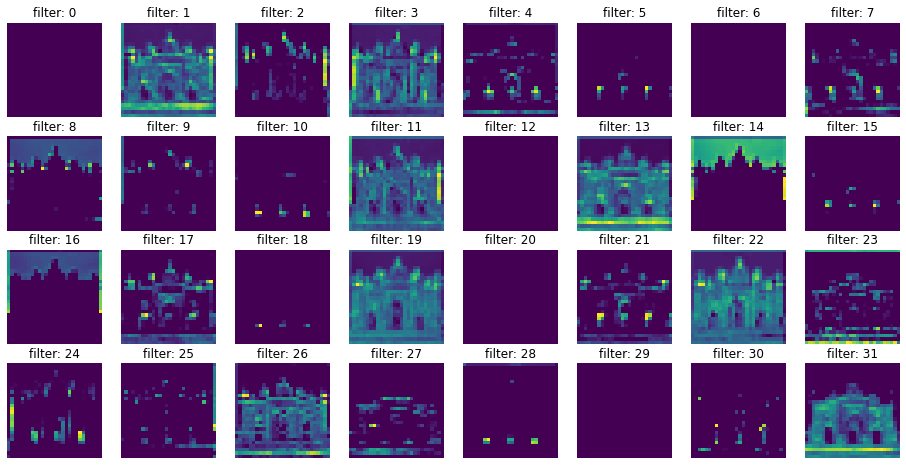

In [25]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i])
plt.show()

## Convolution: 3

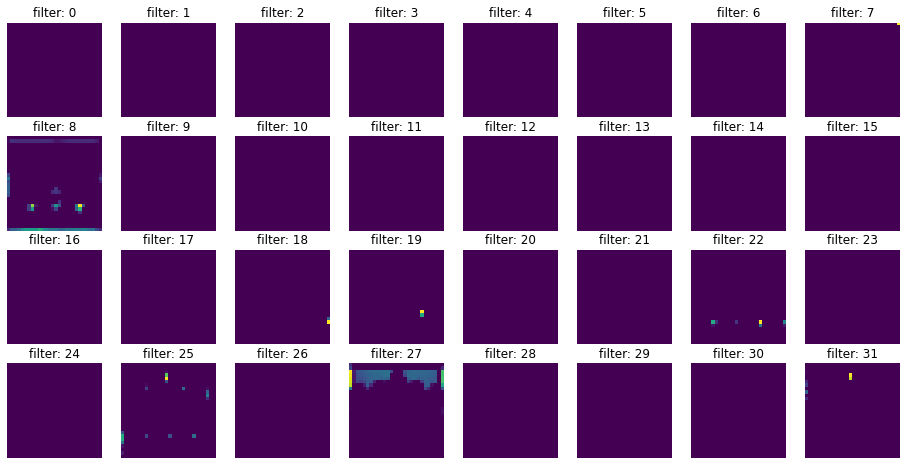

In [26]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i])
plt.show()

## Maxpooling 2D: 3

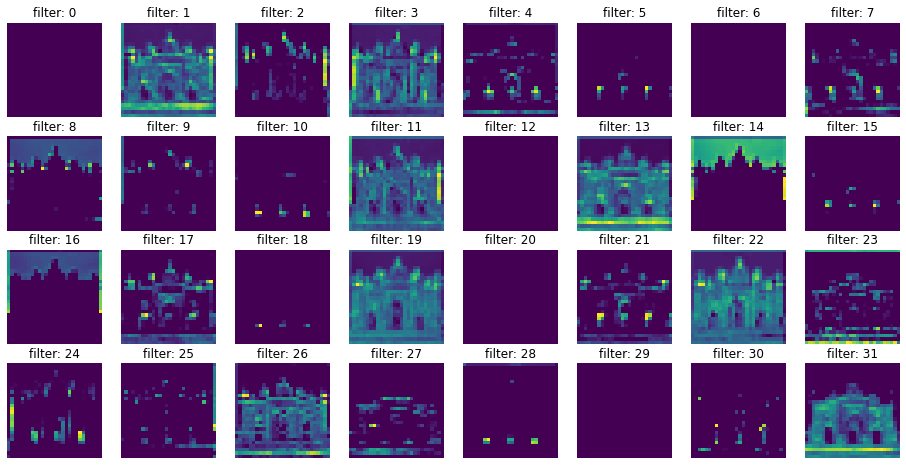

In [27]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i])
plt.show()

## Features Dense: 0

In [28]:
dense_features.flatten()

array([   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        408.76517 ,  117.73537 ,    0.      ,    0.      ,    0.      ,
        526.4237  ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,  703.2834  ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        128.94571 ,    0.      ,    0.      ,    0.      ,  423.77338 ,
          0.      ,    0.      ,    0.      ,    0.      ,  569.119   ,
          0.      ,    0.      ,    0.      ,  446.84787 ,    0.      ,
          0.      ,    0.      ,  815.86646 ,    0.      ,    0.      ,
        123.01488 ,  795.5151  ,  345.7377  ,   13.558857,   37.562637,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        148.44762 ,    0.      ,    0.      ,    0.      ,    0.

## Features Dense: 1

In [29]:
dense_1_features.flatten()

array([0., 1., 0., 0., 0., 0.], dtype=float32)

## Dropout Implementation

In [30]:
dropout_output=Model(inputs=model.input,outputs=model.get_layer('dropout').output)
dropout_1_output=Model(inputs=model.input,outputs=model.get_layer('dropout_1').output)

In [31]:
dropout_features=dropout_output.predict(test_image)
dropout_1_features=dropout_1_output.predict(test_image)
print('Dropout layer feature output shape: ',dropout_features.shape)
print('Dropout_1 layer feature output shape: ',dropout_1_features.shape)

Dropout layer feature output shape:  (1, 14, 14, 256)
Dropout_1 layer feature output shape:  (1, 512)


## Dropout: 0

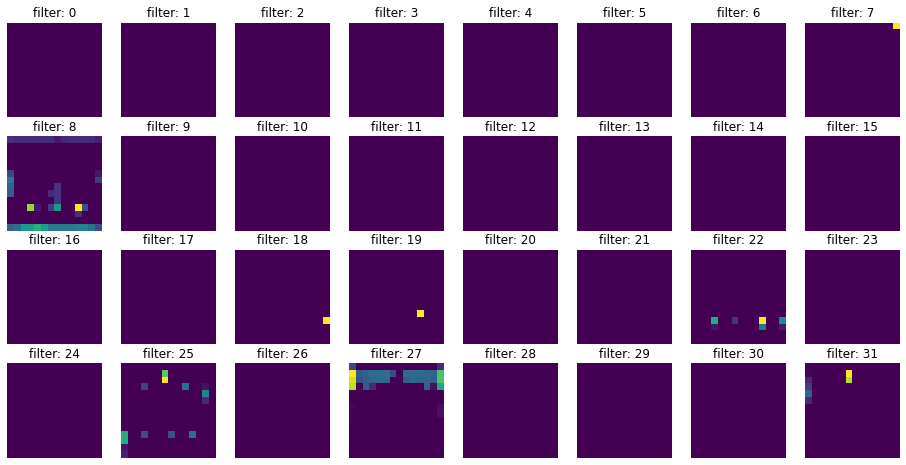

In [32]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(dropout_features[0, :, :, i])
plt.show()

## Dropout: 1

In [33]:
dropout_1_features.flatten()

array([   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        408.76517 ,  117.73537 ,    0.      ,    0.      ,    0.      ,
        526.4237  ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,  703.2834  ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        128.94571 ,    0.      ,    0.      ,    0.      ,  423.77338 ,
          0.      ,    0.      ,    0.      ,    0.      ,  569.119   ,
          0.      ,    0.      ,    0.      ,  446.84787 ,    0.      ,
          0.      ,    0.      ,  815.86646 ,    0.      ,    0.      ,
        123.01488 ,  795.5151  ,  345.7377  ,   13.558857,   37.562637,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        148.44762 ,    0.      ,    0.      ,    0.      ,    0.